### Restaurant and Bar Employment Growth as Share of Total

In [19]:
import requests
import json
import pandas as pd
import config

%matplotlib inline

In [10]:
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
key = '?registrationkey={}'.format(config.bls_key)
headers = {'Content-type': 'application/json'}
series_dict = {
    'Total': 'CES0000000001',
    'Food Services and Drinking Places': 'CES7072200001',
}
inv_map = {v: k for k, v in series_dict.iteritems()}
series_list = series_dict.values()  # Take just the series codes as a list

date_list = [("1990", "1998"), ("1999", "2008"), ("2009", "2017")]
df = pd.DataFrame()

In [11]:
for start, end in date_list:
    data = json.dumps({"seriesid":series_list, "startyear":start, "endyear":end})
    json_data = requests.post('{}{}'.format(url, key), headers=headers, data=data).json()
    # Store the relevant information in a dictionay and combine into a pandas dataframe
    d = {}
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        d[seriesId] = pd.DataFrame(series['data'])
        # Convert BLS API dates to readable format (YYYY-MM-DD)
        d[seriesId]['date'] = pd.to_datetime(d[seriesId]['period'] + ' ' + d[seriesId]['year'])
        # Keep only date and series values
        d[seriesId] = d[seriesId].sort_values(by='date')[['date', 'value']].set_index('date')
    # Rename and round
        d[seriesId] = d[seriesId]['value'].rename(inv_map[seriesId]).astype(float)
    df = df.append(pd.concat([d[series_list[x]] for x in range(len(d))], axis=1))

In [16]:
df['Rest_Share'] = df['Food Services and Drinking Places'] / df['Total']

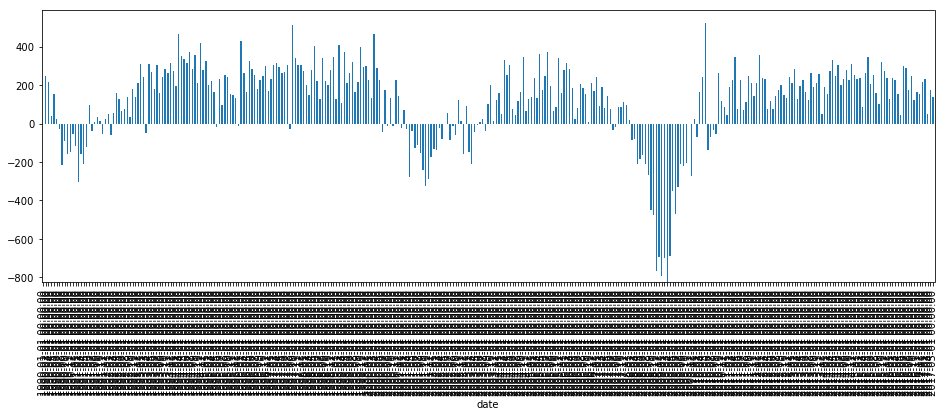

In [31]:
df['Total'].diff().plot(kind='bar', figsize=(16,5))